In [40]:
import numpy as np
import pandas as pd
import h5py
from scipy import io as sio
from pyod import models
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import sklearn

In [3]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest

In [4]:
def get_X_y_73(filename):
    f=h5py.File(filename, 'r')
    d={}
    for k, v in f.items():
        d[k]=v
        print(k, v)
    X=d['X'].value.T
    y=d['y'].value[0]
    
    X=X-np.min(X, axis=0)
    X=X/np.max(X, axis=0)
    
    return X, y

def get_X_y_50(filename):
    dat = sio.loadmat(filename)
    X=dat['X']
    y=dat['y']
    y=y.reshape((-1,))
    X=X-np.min(X, axis=0)
    X=X/np.max(X, axis=0)
    
    return X, y

In [5]:
X, y = get_X_y_50('data/speech.mat')
n_features = X.shape[1]
n_samples = len(y)
n_anomalies = sum(y)

In [6]:
df_prediction = pd.DataFrame()
df_info = pd.DataFrame()

In [7]:
ks=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

# KNN

In [8]:
aucs=[]
for k in ks:
    knn_clf = KNN(contamination=n_anomalies/n_samples, n_neighbors=k)
    knn_clf.fit(X)
    p=knn_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'KNN_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'KNN_{k}',"auc":auc}, ignore_index=True)

1 0.5
2 0.6492436404748445
3 0.5908015828151498
4 0.5108513284341436
5 0.48946297343131706
10 0.47670322215941213
15 0.47845336348219325
20 0.47862521198417185
25 0.47952967778405875
30 0.47852572074618427
35 0.4778745053702657
40 0.47850310910118715
45 0.4786116449971735
50 0.47863425664217063
55 0.47821820237422275
60 0.4784985867721876
65 0.4783448275862069
70 0.47812775579423406
75 0.47790163934426233
80 0.4780599208592425
85 0.4775624646693047
90 0.47745845110231766
95 0.47736348219332947
100 0.47723685698134544


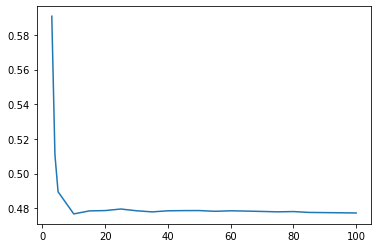

In [9]:
plt.plot(ks[2:], aucs[2:])
plt.show()

# LOF

In [10]:
aucs=[]
for k in ks:
    knn_clf = LOF(contamination=n_anomalies/n_samples, n_neighbors=k)
    knn_clf.fit(X)
    p=knn_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'LOF_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'LOF_{k}',"auc":auc}, ignore_index=True)

1 0.5
2 0.7684070096099491
3 0.728352741661956
4 0.6722984737139627
5 0.6368388920293953
10 0.5505392877331826
15 0.5246489542114189
20 0.5085539853024308
25 0.4996495195025438
30 0.49404183154324477
35 0.489456189937818
40 0.4871317128321085
45 0.4844273600904466
50 0.4836359525155455
55 0.4823109101187111
60 0.48183606557377046
65 0.4805291124929339
70 0.48014923685698135
75 0.4796653476540418
80 0.47931712832108536
85 0.47904578858111924
90 0.47829960429621254
95 0.4782453363482193
100 0.4777795364612776


In [11]:
df_prediction

,KNN_1,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,...,LOF_55,LOF_60,LOF_65,LOF_70,LOF_75,LOF_80,LOF_85,LOF_90,LOF_95,LOF_100
0,0.0,0.545580,0.505416,0.482806,0.479793,0.469140,0.484208,0.483804,0.478975,0.477881,...,0.394255,0.389567,0.388196,0.386324,0.385451,0.382777,0.382726,0.380535,0.378937,0.377548
1,0.0,0.450293,0.364792,0.329538,0.316194,0.315779,0.307649,0.309171,0.301598,0.301613,...,0.172679,0.165016,0.161556,0.157420,0.153734,0.148973,0.144662,0.142500,0.139813,0.136088
2,0.0,0.000000,0.474894,0.432369,0.436594,0.421907,0.431742,0.428933,0.428546,0.428313,...,0.322573,0.317549,0.316790,0.311792,0.310824,0.308088,0.304870,0.304094,0.300988,0.297242
3,0.0,0.000000,0.373870,0.331940,0.324480,0.321609,0.327087,0.324399,0.314718,0.315803,...,0.176623,0.172109,0.170087,0.168002,0.162643,0.158906,0.158037,0.156691,0.154608,0.151384
4,0.0,0.303772,0.223443,0.183146,0.168358,0.164413,0.162736,0.156899,0.155104,0.155822,...,0.026333,0.022193,0.021328,0.020619,0.019541,0.016810,0.016483,0.015572,0.014600,0.013559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0.0,0.554646,0.507489,0.684337,0.759592,0.755455,0.744499,0.750753,0.747821,0.750298,...,0.704274,0.700925,0.703447,0.703156,0.705047,0.704675,0.705301,0.704727,0.704903,0.701124
3682,0.0,0.469045,0.560638,0.659636,0.658725,0.660072,0.666901,0.670878,0.668103,0.678446,...,0.634942,0.629266,0.628260,0.627416,0.630280,0.625677,0.625195,0.625832,0.624306,0.623719
3683,0.0,0.451623,0.436482,0.577211,0.585170,0.605669,0.603541,0.613805,0.609471,0.608706,...,0.544187,0.542349,0.542321,0.539981,0.539003,0.538545,0.539410,0.538898,0.536788,0.535717
3684,0.0,0.630847,0.547849,0.574650,0.612210,0.610132,0.597092,0.595173,0.589810,0.584843,...,0.524415,0.521405,0.517293,0.516423,0.514190,0.512264,0.511923,0.510095,0.506792,0.506460


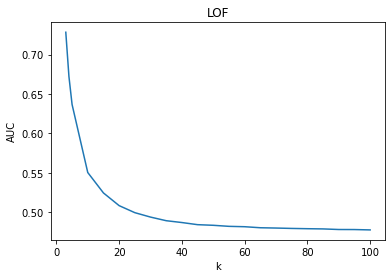

In [12]:
plt.plot(ks[2:], aucs[2:])
plt.xlabel("k")
plt.ylabel("AUC")
plt.title("LOF")
plt.show()

In [13]:
ocsvm_clf=OCSVM(contamination=n_anomalies/n_samples)

In [14]:
ocsvm_clf.fit(X)

OCSVM(cache_size=200, coef0=0.0, contamination=0.016549104720564298, degree=3,
   gamma='auto', kernel='rbf', max_iter=-1, nu=0.5, shrinking=True,
   tol=0.001, verbose=False)

In [15]:
p=ocsvm_clf.predict_proba(X)

In [16]:
roc_auc_score(y, p[:,1])

0.4638778971170152

In [17]:
df_prediction[f'OCSVM']=p[:,1]
df_info=df_info.append({'algorithm':f'OCSVM',"auc":auc}, ignore_index=True)

# Isolation Forest

In [18]:
for k in [11,22,33,44,55,66,77,88,99]:
    if_clf = IForest(contamination=n_anomalies/n_samples, random_state=k)
    if_clf.fit(X)
    p=if_clf.predict_proba(X)
    auc=roc_auc_score(y, p[:,1])
    aucs.append(auc)
    print(k, auc)
    df_prediction[f'IF_{k}']=p[:,1]
    df_info=df_info.append({'algorithm':f'IF_{k}',"auc":auc}, ignore_index=True)

11 0.47967891464104023
22 0.4605765969474279
33 0.4854448841153194
44 0.48469417750141325
55 0.45055963821368006
66 0.4479954776710006
77 0.4473306953080836
88 0.4646919163369135
99 0.4842871678914641


In [19]:
df_prediction

,KNN_1,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,...,OCSVM,IF_11,IF_22,IF_33,IF_44,IF_55,IF_66,IF_77,IF_88,IF_99
0,0.0,0.545580,0.505416,0.482806,0.479793,0.469140,0.484208,0.483804,0.478975,0.477881,...,0.430005,0.401946,0.421100,0.540838,0.506548,0.483794,0.464275,0.430576,0.369951,0.526457
1,0.0,0.450293,0.364792,0.329538,0.316194,0.315779,0.307649,0.309171,0.301598,0.301613,...,0.238680,0.263135,0.270971,0.263505,0.218127,0.359101,0.285471,0.204587,0.315478,0.223885
2,0.0,0.000000,0.474894,0.432369,0.436594,0.421907,0.431742,0.428933,0.428546,0.428313,...,0.387987,0.269258,0.398004,0.440445,0.393027,0.334568,0.340364,0.258627,0.404510,0.339733
3,0.0,0.000000,0.373870,0.331940,0.324480,0.321609,0.327087,0.324399,0.314718,0.315803,...,0.280769,0.247324,0.342537,0.354602,0.371140,0.323916,0.206515,0.251832,0.354241,0.344572
4,0.0,0.303772,0.223443,0.183146,0.168358,0.164413,0.162736,0.156899,0.155104,0.155822,...,0.123745,0.124471,0.106056,0.233531,0.106100,0.267977,0.154210,0.219009,0.170072,0.086189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0.0,0.554646,0.507489,0.684337,0.759592,0.755455,0.744499,0.750753,0.747821,0.750298,...,0.702636,0.649923,0.749467,0.644656,0.842912,0.785533,0.760365,0.471820,0.756213,0.741977
3682,0.0,0.469045,0.560638,0.659636,0.658725,0.660072,0.666901,0.670878,0.668103,0.678446,...,0.648586,0.520297,0.512257,0.542653,0.810202,0.601870,0.666636,0.506455,0.669899,0.716821
3683,0.0,0.451623,0.436482,0.577211,0.585170,0.605669,0.603541,0.613805,0.609471,0.608706,...,0.568288,0.505371,0.508318,0.649609,0.272127,0.544830,0.540202,0.458002,0.666532,0.547859
3684,0.0,0.630847,0.547849,0.574650,0.612210,0.610132,0.597092,0.595173,0.589810,0.584843,...,0.522623,0.411585,0.674406,0.454268,0.434418,0.591028,0.579185,0.599649,0.484644,0.580782


In [20]:
df_info

,algorithm,auc
0,KNN_1,0.500000
1,KNN_2,0.649244
2,KNN_3,0.590802
3,KNN_4,0.510851
4,KNN_5,0.489463
5,KNN_10,0.476703
6,KNN_15,0.478453
7,KNN_20,0.478625
8,KNN_25,0.479530
9,KNN_30,0.478526


In [21]:
df_prediction2=df_prediction.copy()

In [ ]:
#df_prediction=df_prediction2.copy()

In [22]:
for i, r in df_info.iterrows():
    if r['auc']<0.47:
        print(r['algorithm'])
        del df_prediction[r['algorithm']]

IF_22
IF_55
IF_66
IF_77
IF_88


In [23]:
df_prediction

,KNN_1,KNN_2,KNN_3,KNN_4,KNN_5,KNN_10,KNN_15,KNN_20,KNN_25,KNN_30,...,LOF_80,LOF_85,LOF_90,LOF_95,LOF_100,OCSVM,IF_11,IF_33,IF_44,IF_99
0,0.0,0.545580,0.505416,0.482806,0.479793,0.469140,0.484208,0.483804,0.478975,0.477881,...,0.382777,0.382726,0.380535,0.378937,0.377548,0.430005,0.401946,0.540838,0.506548,0.526457
1,0.0,0.450293,0.364792,0.329538,0.316194,0.315779,0.307649,0.309171,0.301598,0.301613,...,0.148973,0.144662,0.142500,0.139813,0.136088,0.238680,0.263135,0.263505,0.218127,0.223885
2,0.0,0.000000,0.474894,0.432369,0.436594,0.421907,0.431742,0.428933,0.428546,0.428313,...,0.308088,0.304870,0.304094,0.300988,0.297242,0.387987,0.269258,0.440445,0.393027,0.339733
3,0.0,0.000000,0.373870,0.331940,0.324480,0.321609,0.327087,0.324399,0.314718,0.315803,...,0.158906,0.158037,0.156691,0.154608,0.151384,0.280769,0.247324,0.354602,0.371140,0.344572
4,0.0,0.303772,0.223443,0.183146,0.168358,0.164413,0.162736,0.156899,0.155104,0.155822,...,0.016810,0.016483,0.015572,0.014600,0.013559,0.123745,0.124471,0.233531,0.106100,0.086189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0.0,0.554646,0.507489,0.684337,0.759592,0.755455,0.744499,0.750753,0.747821,0.750298,...,0.704675,0.705301,0.704727,0.704903,0.701124,0.702636,0.649923,0.644656,0.842912,0.741977
3682,0.0,0.469045,0.560638,0.659636,0.658725,0.660072,0.666901,0.670878,0.668103,0.678446,...,0.625677,0.625195,0.625832,0.624306,0.623719,0.648586,0.520297,0.542653,0.810202,0.716821
3683,0.0,0.451623,0.436482,0.577211,0.585170,0.605669,0.603541,0.613805,0.609471,0.608706,...,0.538545,0.539410,0.538898,0.536788,0.535717,0.568288,0.505371,0.649609,0.272127,0.547859
3684,0.0,0.630847,0.547849,0.574650,0.612210,0.610132,0.597092,0.595173,0.589810,0.584843,...,0.512264,0.511923,0.510095,0.506792,0.506460,0.522623,0.411585,0.454268,0.434418,0.580782


In [24]:
corr=df_prediction.corr()

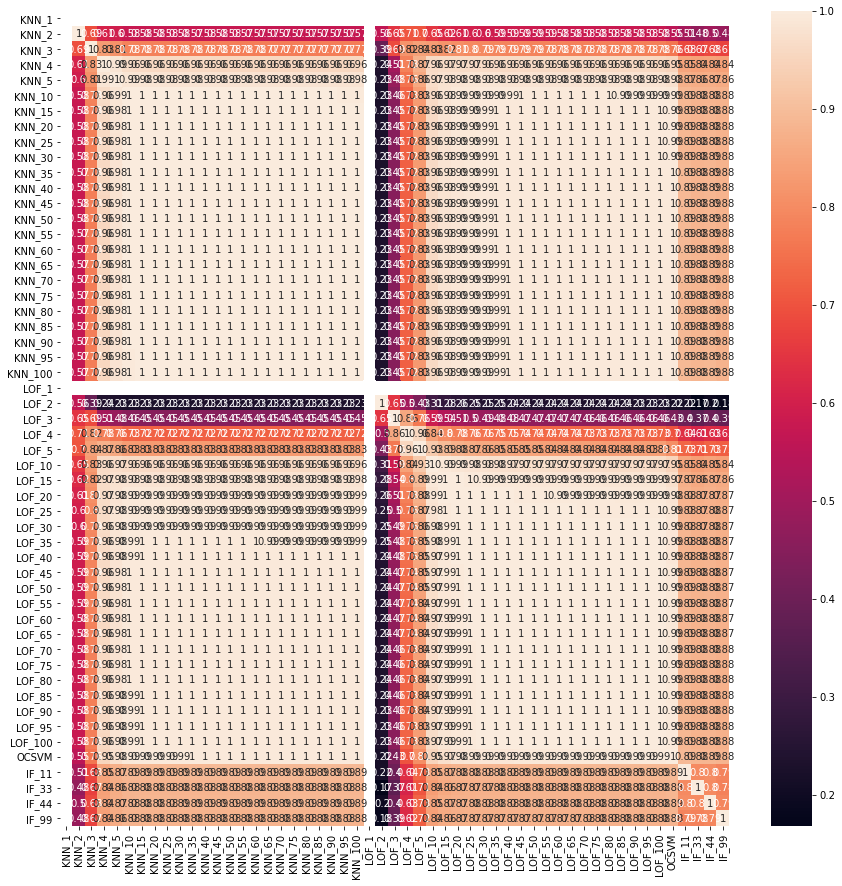

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [26]:
distance_matrix = 1-corr

In [27]:
from medoid_radius import MedoidRadius

mr=MedoidRadius()

mr.fit(distance_matrix.values, 0.15)

D:\projects\ml_rethink\medoid_radius.py:32: RuntimeWarning: invalid value encountered in less
  mask = distance_matrix<radius


In [28]:
mr.labels_

array([ 0,  1,  2,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5, 24, 25, 26, 28, 28,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5])

In [29]:
np.unique(mr.labels_)

array([ 0,  1,  2,  5, 24, 25, 26, 28])

In [30]:
df_new = pd.DataFrame()
for c in np.unique(mr.labels_):
    count=0
    x=np.zeros((n_samples, ))
    for index, l in enumerate(mr.labels_):
        if l==c:
            #print(index)
            x+=df_prediction.values[:, index]
            count+=1
    df_new[f'c_{c}']=x/count
    

In [31]:
df_new

,c_0,c_1,c_2,c_5,c_24,c_25,c_26,c_28
0,0.0,0.545580,0.505416,0.450722,0.0,0.482506,0.405681,0.484801
1,0.0,0.450293,0.364792,0.243945,0.0,0.460636,0.248512,0.294140
2,0.0,0.000000,0.474894,0.379181,0.0,0.216536,0.284828,0.368026
3,0.0,0.000000,0.373870,0.261054,0.0,0.216536,0.167788,0.225491
4,0.0,0.303772,0.223443,0.101804,0.0,0.216536,0.130839,0.129186
...,...,...,...,...,...,...,...,...
3681,0.0,0.554646,0.507489,0.727776,0.0,0.308665,0.312684,0.489425
3682,0.0,0.469045,0.560638,0.652793,0.0,0.255409,0.273301,0.410082
3683,0.0,0.451623,0.436482,0.570762,0.0,0.278330,0.216847,0.370762
3684,0.0,0.630847,0.547849,0.549140,0.0,0.288190,0.224868,0.400154


In [32]:
from xgboost import XGBClassifier

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_new.values, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.7662087912087913

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_prediction.values, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.8300438596491228

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.7681995686891647

In [45]:
X_all = np.concatenate([X, df_new.values], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_all, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.8494336060415356

In [46]:
X_all = np.concatenate([X, df_prediction.values], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_all, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.9537669974274163

In [48]:
X_all = np.concatenate([X, df_prediction.values, df_new.values], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_all, y)
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:,1])

0.9582804434289582